# SUBMITTED BY : <font color = blue> RAJESH SUGURU </font>

# Ref : https://learn.upgrad.com/v/course/498/session/71393/segment/399212

# Assignment: <font color = blue> Advanced Regression </font>

# Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

## The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Solution Approach

### Ref : https://learn.upgrad.com/v/course/498/session/71032/segment/396797 (Generalized Regression)
### Ref : https://learn.upgrad.com/v/course/498/session/71033/segment/396804 (Regularized Regression)

### Performing Data Analysis and Cleaning
- Null Value Treatment<br/>
-- Identify the Percentage % of missing values (null values) <br/>
-- Cleanup and Impute on need basis<br/>
-- Imputing missing value<br/>
### Create Derived variables and drop original values 

### Performing Exploratory Data Analysis (EDA) and Preparing Train, Test Data
- Plot heatmap to understand the corellation between varables
- Hadle the outliers for the quantiles threshods as below<br/>
-- Lower quantile : 0.25 <br/>
-- Upper quantile : 0.99 <br/>
- Identify records with ordinal in nature and map those with the numbers
### Dummy Variables
- Create dummy variables by using pandas get_dummies function <br/> 
- Join dummy variables with the actual dataset
### Check the distribution of target variables and perform below 2 actions
- Splittg <br/>
- Scaling
### Split the dependent and independent variables for test and train data
### Perform Lasso Regression Model 
- Caluclate R2 scores for both train and test data for the Alpha value 0.001 <br/>
- Improve the model by finding the optimal value of alpha using GridSearchCV
- Plot the graph to understand the model performance and how it will be penalize for various values of Alpha. To find Optimal value of Alpha
- Measure the performance
- List out the Top 10 Features and Coefficient values after appllied the LASSO regression regulerization for the given Alpha 0.001
### Ridge Regression Model
- Caluclate R2 scores for both train and test data for the Alpha value 0.001 <br/>
- Improve model with the optimal value of alpha using GridSearchCV
- Plot the graph to understand the model performance and how it will be penalize for various values of Alpha. To find Optimal value of Alpha
- Determine optimal value of Alpha
- List out the Top 10 Features and Coefficient values after appllied the RIDGE regression regulerization for the determined optimal Alpha value
### Final Model Selection
### Inferences
- Which variables are significant in predicting the price of a house<br/>
- How well those variables describe the price of a house.<br/>
- Determine the optimal value of lambda for ridge and lasso regression.<br/>
# Achieve Best Fit Model to predict the Housing Prices

### <font color = Blue> Assignment Part-II to test the scnerios given in the Questions<font/>


# <font color = green> Assignment PART-I Starts Here <font/>

### Import required libraries and ignore the warnings

In [319]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

# <font color = grey>Performing Data Analysis and Cleaning Starts Here</font>

In [320]:
house_price = pd.read_csv('train.csv')

In [321]:
house_price.shape

(1460, 81)

In [322]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [323]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [324]:
house_price.describe([0.25,0.50,0.75,0.99]) 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Null Value Treatment

>> - Identify the Percentage % of missing values (null values) <br/>
>> - Cleanup and Impute on need basis

In [325]:
(round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(18))*100

PoolQC          100.0
MiscFeature      96.0
Alley            94.0
Fence            81.0
FireplaceQu      47.0
LotFrontage      18.0
GarageType        6.0
GarageCond        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
BsmtFinType1      3.0
BsmtExposure      3.0
BsmtCond          3.0
BsmtQual          3.0
BsmtFinType2      3.0
MasVnrArea        1.0
MasVnrType        1.0
dtype: float64

#### Find out and perform cleanup of the columns with missing values more than 10%

In [326]:
((round(house_price.isnull().sum()/len(house_price.index),2)[(round(house_price.isnull().sum()/len(house_price.index),2))*100 > 10.0])*100).sort_values(ascending=False).head(10)

PoolQC         100.0
MiscFeature     96.0
Alley           94.0
Fence           81.0
FireplaceQu     47.0
LotFrontage     18.0
dtype: float64

In [327]:
house_price = house_price.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1)

## Derive Age of property from Date Fields

>> - Derive age from the Year columns and fill the derived columns with the number<br/>
>> - Logic to derive age : DERIVED_AGE = MAX(Built_Year) - Built_Year<br/> 
>> - The max year for all these columns  turned out to be 2010<br/>
>> - Drop the actual Year and month columns


In [328]:
house_price['YearBuilt_Age'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['YearRemodAdd_Age'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
house_price['GarageYrBlt_Age'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['YrSold_Age'] = house_price.YrSold.max()-house_price.YrSold
house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Age','YearRemodAdd_Age',
             'GarageYrBlt_Age','YrSold_Age']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
666,1965,1979,1965.0,2007,45,31,45.0,3
682,1996,1997,1996.0,2008,14,13,14.0,2
1005,1977,1977,1977.0,2008,33,33,33.0,2
396,1972,1972,1985.0,2009,38,38,25.0,1
306,1990,1991,1990.0,2007,20,19,20.0,3
198,1912,1950,NaN,2009,98,60,NaN,1
640,2003,2004,2003.0,2008,7,6,7.0,2
549,2003,2004,2003.0,2009,7,6,7.0,1
476,1997,1998,1997.0,2008,13,12,13.0,2
180,2000,2000,2000.0,2007,10,10,10.0,3


In [329]:
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis=1)

## Imputing missing value
>> - Note that impute GarageYrBlt_Age with -1 as these houses donot have garage

In [330]:
house_price.MasVnrType.fillna('None',inplace=True)
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(),inplace=True)
house_price.BsmtQual.fillna('TA',inplace=True)
house_price.BsmtCond.fillna('TA',inplace=True)
house_price.BsmtExposure.fillna('No',inplace=True)
house_price.BsmtFinType1.fillna('Unf',inplace=True)
house_price.BsmtFinType2.fillna('Unf',inplace=True)
house_price.GarageType.fillna('Attchd',inplace=True)
house_price.GarageYrBlt_Age.fillna(-1,inplace=True)
house_price.GarageFinish.fillna('Unf',inplace=True)
house_price.GarageQual.fillna('TA',inplace=True)
house_price.GarageCond.fillna('TA',inplace=True)

## As 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

In [331]:
house_price.Street.value_counts()
house_price.Utilities.value_counts()
house_price = house_price.drop(['Street','Utilities'],axis=1)

## 'Id' column is also of no use for our analysis hence dropping the column

In [332]:
house_price = house_price.drop('Id',axis=1)

In [333]:
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


# <font color = grey>Performing Data Analysis and Cleaning Ends Here</font>

In [17]:
# sns.boxplot(y = house_price['PoolArea'])
# house_price['WoodDeckSF'].value_counts()

# <font color = grey>Performing Exploratory Data Analysis (EDA) and Preparing Train, Test Data Starts Here</font>

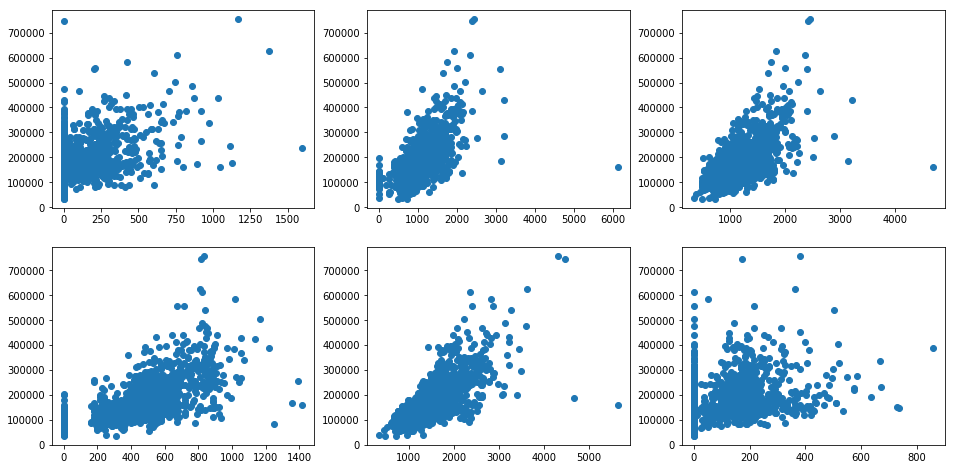

In [334]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)

## Plot heatmap to understand the corellation between varables

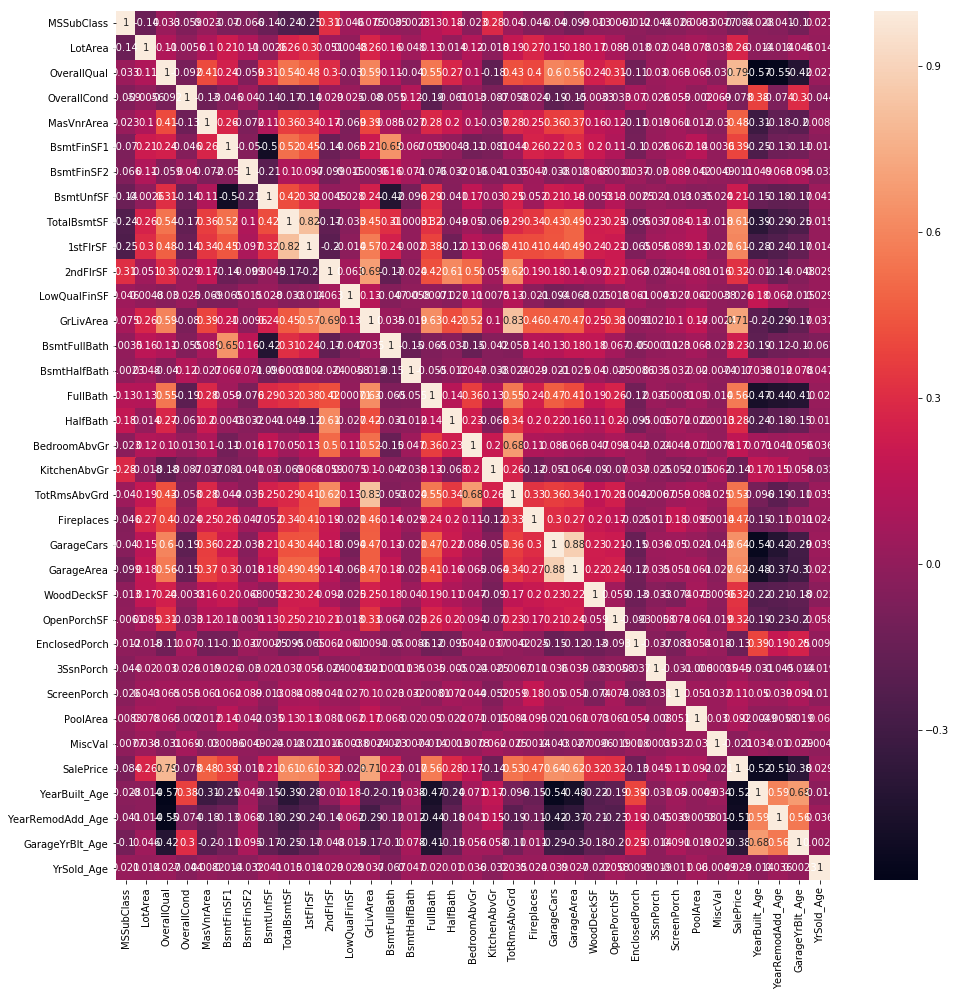

In [335]:
plt.figure(figsize=(16,16))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()

## Hadle the outliers for the quantiles threshods as below

>> - Lower quantile : 0.25 <br/>
>> - Upper quantile : 0.99 <br/>
>> - Noticed that 19 outliers are dropped with the selected quantile threshold criteria

In [336]:
print(house_price.shape)

(1460, 71)


In [337]:
num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [338]:
house_price.shape

(1441, 71)

In [339]:
house_price[list(house_price.dtypes[house_price.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


## Identify records with ordinal in nature and map those with the numbers

In [340]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [341]:
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

## Converted columns after mapping is performed

In [342]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


## Dummy Variable

>> - Create dummy variables by using pandas get_dummies function <br/> 
>> - Join dummy variables with the actual dataset

In [343]:
dummy_col = pd.get_dummies(house_price[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price = pd.concat([house_price,dummy_col],axis='columns')

house_price = house_price.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

## Check the distribution of target variables and perform below 2 actions
>> - Splittg <br/>
>> - Scaling

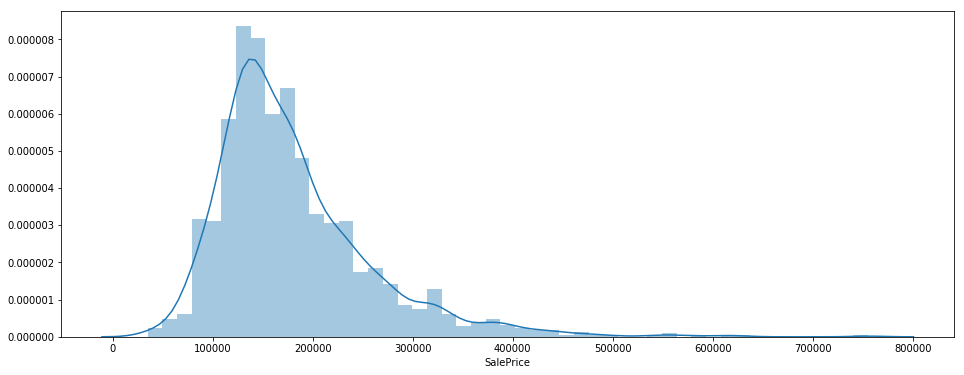

In [344]:
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

### Observed fatty tail and skewness at the right side

#### Create train and test dataset with the given ratio below
>> - Train dataset : 70%<br/>
>> - Test Dataset  : 30%

In [346]:
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [347]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


## Scale the train dataset
>> - Note : As scale of our dependent valriable SalePrice is very different with the independent variable scale scaling the dependent variable as well.<br/>
>> - Train data columns are scaled by using scaler.fit_transform <br/>
>> - Test data columns are scaled with the scaler.transform

In [348]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

## Verify the distribution after scaling train and test data

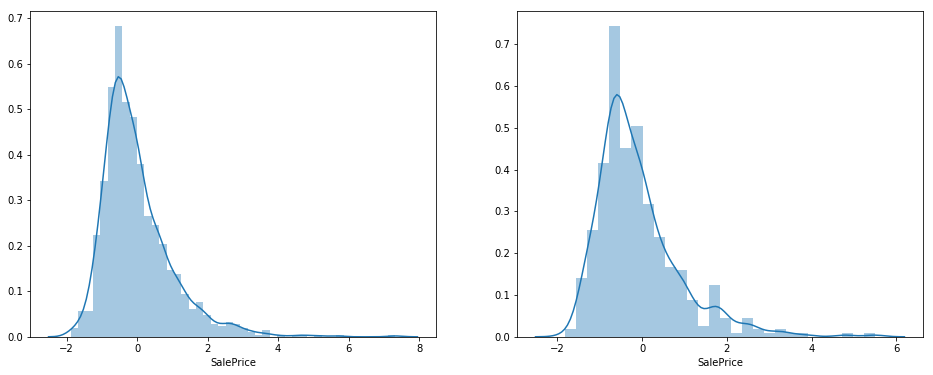

In [349]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

## Split the dependent and independent variables for test and train data

In [350]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [351]:
y_test = df_test.pop('SalePrice')
X_test = df_test

# <font color = grey>Performing Exploratory Data Analysis (EDA) and Preparing Train, Test Data Ends Here</font>

# <font color = grey>Lasso Regression Model Starts Here</font>
>> - Caluclate R2 scores for both train and test data for the given Alpha value 0.001 <br/>



In [352]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9177880963318781
0.87870868119276


In [353]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.206),
 ('LotArea', -0.08),
 ('LotShape', 0.048),
 ('LandSlope', 0.025),
 ('OverallQual', 0.0),
 ('OverallCond', 0.148),
 ('MasVnrArea', 0.073),
 ('ExterQual', 0.098),
 ('ExterCond', 0.099),
 ('BsmtQual', -0.005),
 ('BsmtCond', 0.056),
 ('BsmtExposure', -0.001),
 ('BsmtFinType1', 0.071),
 ('BsmtFinSF1', 0.001),
 ('BsmtFinType2', 0.11),
 ('BsmtFinSF2', 0.015),
 ('BsmtUnfSF', 0.014),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', 0.074),
 ('CentralAir', 0.004),
 ('1stFlrSF', -0.014),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.053),
 ('GrLivArea', -0.01),
 ('BsmtFullBath', 0.28),
 ('BsmtHalfBath', 0.017),
 ('FullBath', -0.007),
 ('HalfBath', 0.025),
 ('BedroomAbvGr', 0.013),
 ('KitchenAbvGr', -0.048),
 ('KitchenQual', -0.042),
 ('TotRmsAbvGrd', 0.071),
 ('Fireplaces', 0.067),
 ('GarageFinish', 0.011),
 ('GarageCars', 0.015),
 ('GarageArea', -0.003),
 ('GarageQual', 0.071),
 ('GarageCond', 0.015),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.015),
 ('EnclosedPorch', -0.006),
 ('3SsnPor

## Improve the model by finding the optimal value of alpha using GridSearchCV with the below info

>> - Hyper parameters : 7 Alpha values [0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]<br/>
>> - Scoring : Rsquared<br/> 
>> - Number of folds for cross validation : 10<br/>
>> - Verbose : 1<br/>
>> - Return train score : Yes<br/>
>> - 10 folds , 7 penialized values (alpha values) totalling to 70 fits of cross validation

In [354]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

## Check Train and Test scores for the given alpha values

>> - Alpha Values : [0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]

In [355]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.092422,0.015848,0.003561,0.005468,0.001,{'alpha': 0.001},0.867682,0.932390,0.802755,0.891364,...,0.927577,0.919795,0.916778,0.919615,0.916863,0.929979,0.919451,0.916363,0.920221,0.004628
1,0.020057,0.009335,0.000000,0.000000,0.010,{'alpha': 0.01},0.837234,0.893232,0.836776,0.845679,...,0.872406,0.868514,0.865754,0.866918,0.865451,0.900560,0.869008,0.864372,0.870964,0.010210
2,0.009132,0.009154,0.001762,0.004637,0.100,{'alpha': 0.1},0.767165,0.807181,0.758993,0.758260,...,0.796125,0.806976,0.798821,0.797355,0.796441,0.832306,0.799514,0.795812,0.802519,0.010575
3,0.007186,0.006517,0.000200,0.000400,1.000,{'alpha': 1.0},0.243706,0.256956,0.254868,0.324529,...,0.346756,0.336738,0.321643,0.339849,0.326239,0.334743,0.331701,0.333979,0.335918,0.007614
4,0.007812,0.007812,0.000000,0.000000,5.000,{'alpha': 5.0},0.238512,0.187156,0.199314,0.267715,...,0.286886,0.279689,0.265242,0.282379,0.267275,0.279324,0.275788,0.278208,0.278991,0.007515
5,0.004688,0.007160,0.001562,0.004687,10.000,{'alpha': 10.0},0.160805,0.107302,0.109807,0.161437,...,0.171999,0.169978,0.156195,0.170848,0.160610,0.178059,0.164626,0.161775,0.169328,0.007970
6,0.006250,0.007654,0.001562,0.004687,20.000,{'alpha': 20.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Plot the graph to understand the model performance and how it will be penalize for various values of Alpha. To find Optimal value of Alpha

>> - X Axis : Alpha <br/>
>> - Y Axis : R2 Score

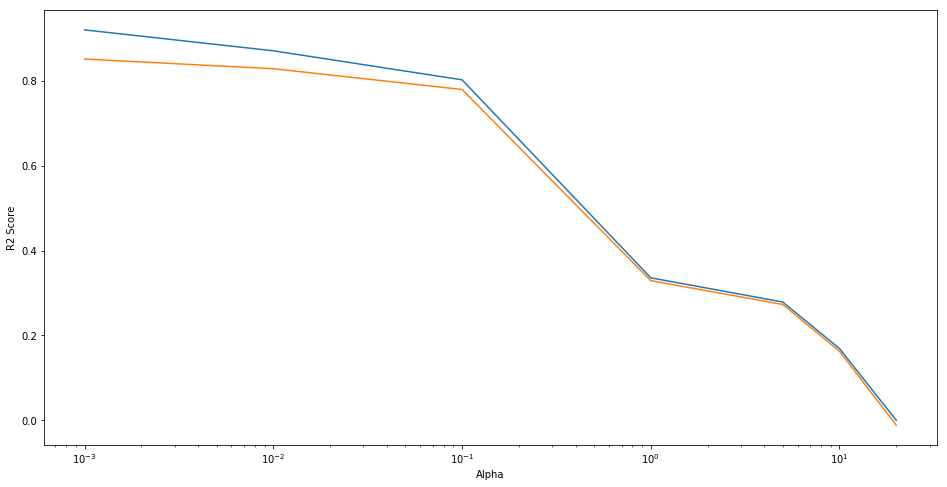

In [356]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

## Optimal Value of Alpha determined for the LASSO Regression model is : 0.001 
>> - R2 Score for Train : 0.9177880963318781 <br/>
>> - R2 Score for Test : 0.87870868119276 <br/>

In [357]:
model_cv.best_params_

{'alpha': 0.001}

In [358]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9177880963318781
0.87870868119276


## List out the Top 10 Features and Coefficient values afte appllied the LASSO regression regulerization for the given Alpha 0.001

In [362]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [363]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
120,Exterior1st_AsphShn,1.285161
76,Neighborhood_OldTown,0.469813
82,Neighborhood_Timber,0.355562
75,Neighborhood_NridgHt,0.293853
66,Neighborhood_Edwards,0.291205
24,BsmtFullBath,0.279560
185,SaleType_Oth,0.248714
123,Exterior1st_CBlock,0.205479
57,LotConfig_FR2,0.174155
155,Foundation_Stone,0.151384


# INFERENCES DRAWN LASSO REGRESSION:

## Optimal Value of Alpha : 0.001
    
## **Significant Features to Predict House Value:**

- Exterior1st_AsphShn : Asphalt Shingles
- Neighborhood_OldTown : Old Town
- Neighborhood_Timber : Timberland
- Neighborhood_NridgHt : Northridge Heights
- Neighborhood_Edwards : Edwards
- BsmtFullBath : Basement full bathrooms
- SaleType_Oth : Other
- Exterior1st_CBlock : Cinder Block
- LotConfig_FR2 : Frontage on 2 sides of property
- Foundation_Stone : Stone

### Based ont the analysis performed these coefficient values are significant to predict the house value

# <font color = grey>Lasso Regression Model Ends Here</font>

# <font color = grey>Ridge Regression Model Starts Here</font>

In [364]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9260886802133259
0.863442693655992


## We can see the alpha value 0.001 is not optimal for ridge regression

>> - Model looks like overfitting with the clear difference in the train and test R2 score by 6.26% <br/>
## Improve model with the optimal value of alpha using GridSearchCV
>> - Hyper parameters : 10 Alpha values [0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]<br/>
>> - Scoring : Rsquared<br/> 
>> - Number of folds for cross validation : 10<br/>
>> - Verbose : 1<br/>
>> - Return train score : Yes<br/>
>> - 10 folds , 10 penialized values (alpha values) totalling to 100 fits of cross validation

In [365]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

## Check Train and Test scores for the given alpha values 

>> - Alpha Values : [0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]

In [366]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008996,0.001095,0.000699,0.000457,0.001,{'alpha': 0.001},0.797450,0.917188,0.735015,0.869161,...,0.937536,0.929095,0.925884,0.927594,0.925545,0.938255,0.928058,0.924899,0.929134,0.004733
1,0.006897,0.001220,0.000699,0.000458,0.010,{'alpha': 0.01},0.803057,0.917450,0.739225,0.869345,...,0.937524,0.929093,0.925881,0.927593,0.925541,0.938251,0.928055,0.924895,0.929128,0.004731
2,0.007796,0.001326,0.000899,0.000300,0.100,{'alpha': 0.1},0.822298,0.918978,0.769811,0.871065,...,0.936928,0.928950,0.925697,0.927492,0.925325,0.938144,0.927847,0.924720,0.928909,0.004671
3,0.006796,0.000872,0.000899,0.000300,0.200,{'alpha': 0.2},0.832923,0.919907,0.791239,0.872589,...,0.935991,0.928676,0.925375,0.927263,0.924962,0.937981,0.927485,0.924430,0.928544,0.004595
4,0.006297,0.000458,0.000800,0.000400,0.500,{'alpha': 0.5},0.848990,0.920888,0.824922,0.875270,...,0.933069,0.927613,0.924210,0.926277,0.923712,0.937415,0.926200,0.923368,0.927262,0.004453
5,0.006597,0.000490,0.000699,0.000458,0.900,{'alpha': 0.9},0.858332,0.920595,0.843408,0.876881,...,0.929812,0.926110,0.922629,0.924804,0.922061,0.936662,0.924485,0.921884,0.925586,0.004451
6,0.006597,0.000490,0.000599,0.000489,1.000,{'alpha': 1.0},0.859793,0.920415,0.846079,0.877130,...,0.929122,0.925747,0.922252,0.924442,0.921671,0.936481,0.924080,0.921525,0.925195,0.004469
7,0.007900,0.005942,0.000218,0.000437,5.000,{'alpha': 5.0},0.871347,0.913404,0.861826,0.878916,...,0.916837,0.916257,0.912516,0.914568,0.911885,0.931562,0.914224,0.912018,0.915731,0.005579
8,0.006821,0.005453,0.001605,0.003843,10.000,{'alpha': 10.0},0.870617,0.909902,0.860221,0.878020,...,0.911043,0.910205,0.906230,0.908154,0.905810,0.928197,0.908296,0.905837,0.909950,0.006357
9,0.005424,0.006091,0.003382,0.006133,20.000,{'alpha': 20.0},0.867414,0.906925,0.857146,0.875371,...,0.904478,0.903225,0.898984,0.900811,0.898819,0.924064,0.901468,0.898634,0.903269,0.007207


## Plot the graph to understand the model performance and how it will be penalize for various values of Alpha. To find Optimal value of Alpha

>> - X Axis : Alpha <br/>
>> - Y Axis : R2 Score

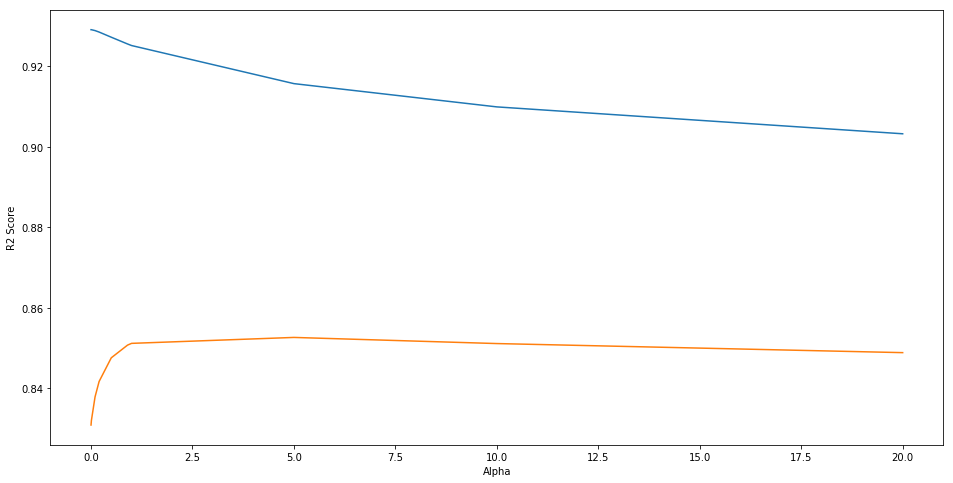

In [367]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
#plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [368]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 5.0}

## Optimal Value of Alpha determined for the model is : 0.5 with the best R2 scores >85% for both tain and test.R2 score difference is  3.57%
>> - R2 Score for Train : 0.914276987760725 <br/>
>> - R2 Score for Test : 0.878520099655548 <br/>

## Inferences Drawn for Ridge Regression:
>> - Compared to Alpha=0.001 model perfoms better at Alpha=5.0 with increased predicting power on test data

In [370]:
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.914276987760725
0.878520099655548


## List out the Top 10 Features and Coefficient values after appllied the RIDGE regression regulerization for the given Alpha 5.0

In [371]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [372]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
120,Exterior1st_AsphShn,0.579583
76,Neighborhood_OldTown,0.366112
94,Condition2_PosA,0.283243
82,Neighborhood_Timber,0.279615
75,Neighborhood_NridgHt,0.216034
66,Neighborhood_Edwards,0.206833
185,SaleType_Oth,0.193443
123,Exterior1st_CBlock,0.189693
24,BsmtFullBath,0.189177
22,LowQualFinSF,0.174889


# INFERENCES DRAWN RIDGE REGRESSION:

## Optimal Value of Alpha : 5.0
    
## **Significant Features to Predict House Value:**


- Exterior1st_AsphShn : Asphalt Shingles
- Neighborhood_OldTown : Old Town
- Condition2_PosA : Adjacent to postive off-site feature
- Neighborhood_Timber : Timberland
- Neighborhood_NridgHt : Northridge Heights
- Neighborhood_Edwards : Edwards
- SaleType_Oth : Other
- Exterior1st_CBlock : Cinder Block
- BsmtFullBath : Basement full bathrooms
- LowQualFinSF : Low quality finished square feet (all floors)

### Based on the Anlaysis performed these coefficient values are good to predict the house value


# <font color = grey>Ridge Regression Model Ends Here</font>

# Final Model Selection

### Final LASSO REGRESSION MODEL R2 Scores

In [373]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9177880963318781
0.87870868119276


### Final RIDGE REGRESSION MODEL R2 Scores

In [375]:
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))


0.914276987760725
0.878520099655548


# Inferences Drawn

- For the given Data set both Lasso and RIDGE regression models are performing well when we penalize with optmal value of Alpha
- Whereas when measured the R2 score for the different set of Alpha values for both Lasso and Ridge regressions, Lasso regression looks promsing when penalizing with higher values of Alpha,a s both test and train R2 scores are consistenty close enough.
- After compairing both the models we can see that the below Top 5 Features are best explaining the DataSet<br/>
-- Exterior1st_AsphShn : Asphalt Shingles <br/>
-- Neighborhood_OldTown : Old Town <br/>
-- Neighborhood_Timber : Timberland <br/>
-- Neighborhood_NridgHt : Northridge Heights <br/>
-- Neighborhood_Edwards : Edwards <br/>

#### Best alpha value for Lasso : {'alpha': 0.001}

#### Best alpha value for Ridge : {'alpha': 5.0}

# <font color = green> Assignment PART-I Ends Here <font/>

# <font color = Blue> Assignment Part-II STARTS HERE<font/>

### Question 1 : When doubled the Alpha value in Ridge Regression
- R2 Score Train: 0.9087686687432097
- R2 Score Test: 0.8806755004050879

In [376]:
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9087686687432097
0.8806755004050879


In [377]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
120,Exterior1st_AsphShn,0.579583
76,Neighborhood_OldTown,0.366112
94,Condition2_PosA,0.283243
82,Neighborhood_Timber,0.279615
75,Neighborhood_NridgHt,0.216034
66,Neighborhood_Edwards,0.206833
185,SaleType_Oth,0.193443
123,Exterior1st_CBlock,0.189693
24,BsmtFullBath,0.189177
22,LowQualFinSF,0.174889


### When doubled the Alpha value in Lasso Regression
- R2 Score Train : 0.911126570120245
- R2 Score Test : 0.8804704328922215

In [379]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.911126570120245
0.8804704328922215


In [380]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
120,Exterior1st_AsphShn,1.285161
76,Neighborhood_OldTown,0.469813
82,Neighborhood_Timber,0.355562
75,Neighborhood_NridgHt,0.293853
66,Neighborhood_Edwards,0.291205
24,BsmtFullBath,0.279560
185,SaleType_Oth,0.248714
123,Exterior1st_CBlock,0.205479
57,LotConfig_FR2,0.174155
155,Foundation_Stone,0.151384


Question 3 : 
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [381]:
X_train_Old= df_train
df_train=df_train.drop(['Exterior1st_AsphShn','Neighborhood_OldTown','Neighborhood_Timber','Neighborhood_NridgHt','Neighborhood_Edwards'],axis=1)
X_train = df_train

In [382]:
X_test_Old = df_test
df_test=df_test.drop(['Exterior1st_AsphShn','Neighborhood_OldTown','Neighborhood_Timber','Neighborhood_NridgHt','Neighborhood_Edwards'],axis=1)
X_test = df_test

In [383]:
print('Before Removed the Top 5 Features :', len(X_train_Old.columns))
print('After Removed the Top 5 Features :' , len(X_train.columns))


Before Removed the Top 5 Features : 192
After Removed the Top 5 Features : 187


## Re develop the Lasso regression model after removed the top 5 features from X_train and X_test

In [384]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9107906452762177
0.8800035182821807


In [385]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.292),
 ('LotArea', -0.075),
 ('LotShape', 0.049),
 ('LandSlope', 0.022),
 ('OverallQual', 0.0),
 ('OverallCond', 0.17),
 ('MasVnrArea', 0.07),
 ('ExterQual', 0.118),
 ('ExterCond', 0.127),
 ('BsmtQual', -0.019),
 ('BsmtCond', 0.082),
 ('BsmtExposure', -0.012),
 ('BsmtFinType1', 0.064),
 ('BsmtFinSF1', 0.003),
 ('BsmtFinType2', 0.12),
 ('BsmtFinSF2', 0.009),
 ('BsmtUnfSF', 0.022),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', 0.084),
 ('CentralAir', 0.006),
 ('1stFlrSF', -0.029),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.057),
 ('GrLivArea', -0.004),
 ('BsmtFullBath', 0.251),
 ('BsmtHalfBath', 0.008),
 ('FullBath', -0.013),
 ('HalfBath', 0.024),
 ('BedroomAbvGr', 0.013),
 ('KitchenAbvGr', -0.05),
 ('KitchenQual', -0.04),
 ('TotRmsAbvGrd', 0.085),
 ('Fireplaces', 0.08),
 ('GarageFinish', 0.016),
 ('GarageCars', 0.0),
 ('GarageArea', -0.018),
 ('GarageQual', 0.099),
 ('GarageCond', 0.007),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.017),
 ('EnclosedPorch', -0.01),
 ('3SsnPorch', 

#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [386]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [387]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.055775,0.009083,0.000702,0.000459,0.001,{'alpha': 0.001},0.847689,0.926476,0.784551,0.874213,...,0.921273,0.913636,0.909432,0.911433,0.910352,0.925450,0.912197,0.909213,0.913508,0.005379
1,0.011593,0.001020,0.000500,0.000500,0.010,{'alpha': 0.01},0.832281,0.890541,0.848444,0.837598,...,0.865088,0.866382,0.862613,0.862760,0.862611,0.898125,0.864784,0.860931,0.867304,0.010533
2,0.007295,0.000458,0.000900,0.000300,0.100,{'alpha': 0.1},0.767165,0.807181,0.758993,0.758260,...,0.796125,0.806976,0.798821,0.797355,0.796441,0.832306,0.799514,0.795812,0.802519,0.010575
3,0.007196,0.000600,0.000499,0.000499,1.000,{'alpha': 1.0},0.243706,0.256956,0.254868,0.324529,...,0.346756,0.336738,0.321643,0.339849,0.326239,0.334743,0.331701,0.333979,0.335918,0.007614
4,0.012393,0.002614,0.000600,0.000490,5.000,{'alpha': 5.0},0.238512,0.187156,0.199314,0.267715,...,0.286886,0.279689,0.265242,0.282379,0.267275,0.279324,0.275788,0.278208,0.278991,0.007515


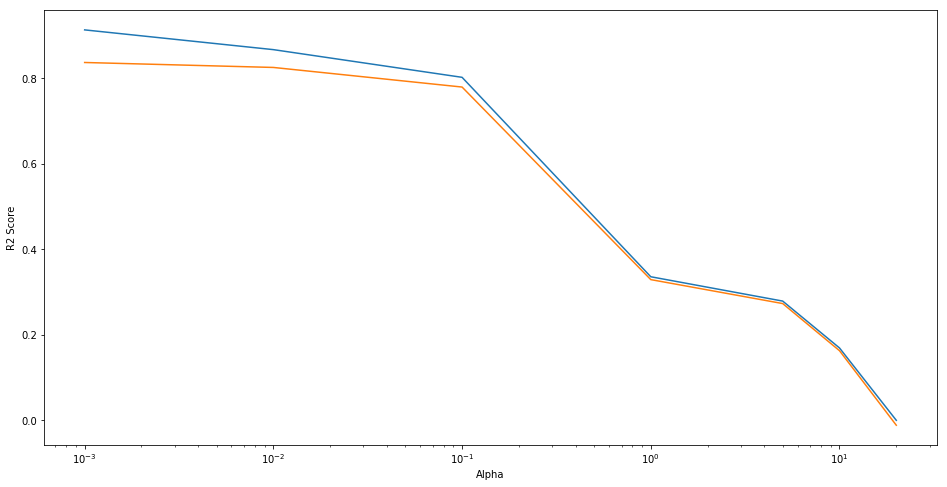

In [388]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [389]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [390]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9107906452762177
0.8800035182821807


In [393]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [394]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)
#'Exterior1st_AsphShn','Neighborhood_OldTown','Neighborhood_Timber','Neighborhood_NridgHt','Neighborhood_Edwards'


,Feature,Coef
116,Exterior1st_BrkComm,1.168050
180,SaleType_Oth,0.294049
66,Neighborhood_Gilbert,0.261866
24,BsmtFullBath,0.250957
118,Exterior1st_CBlock,0.203419


## Top 5 Features after dropping previous top 5 features and reconstucting the LASSO regression Model<br/>

- Exterior1st_BrkComm : Brick Common <br/>
- SaleType_Oth : Other	<br/>
- Neighborhood_Gilbert : Gilbert<br/>
- BsmtFullBath : Basement full bathrooms<br/>
- Exterior1st_CBlock : Cinder Block<br/>

# <font color = Blue> Assignment Part-II ENDS HERE<font/>